In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Spaceship Titanic

## Data Preprocessing

In [2]:
submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
def find_outliers(data, column):
    column_data = data[column]

    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

    return outliers

In [8]:
all_outliers = {}
numeric_columns = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for column in numeric_columns:
    outliers = find_outliers(train, column)
    all_outliers[column] = outliers

for column, outliers in all_outliers.items():
    print(f"Aykırı Değerler - {column}:")
    print(outliers)
    print()

Aykırı Değerler - Age:
118     67.0
280     67.0
338     79.0
378     68.0
416     74.0
        ... 
7729    72.0
8042    67.0
8288    76.0
8369    73.0
8516    70.0
Name: Age, Length: 77, dtype: float64

Aykırı Değerler - RoomService:
4        303.0
13       719.0
16      1286.0
20       412.0
27       980.0
         ...  
8646     676.0
8661     699.0
8675    1030.0
8682     240.0
8692     126.0
Name: RoomService, Length: 1861, dtype: float64

Aykırı Değerler - FoodCourt:
2       3576.0
3       1283.0
5        483.0
6       1539.0
8        785.0
         ...  
8686    1146.0
8687    3208.0
8688    6819.0
8691    1049.0
8692    4688.0
Name: FoodCourt, Length: 1823, dtype: float64

Aykırı Değerler - ShoppingMall:
3        371.0
4        151.0
11       589.0
12      1123.0
15       876.0
         ...  
8669     205.0
8674    1085.0
8682     510.0
8683     149.0
8690    1872.0
Name: ShoppingMall, Length: 1829, dtype: float64

Aykırı Değerler - Spa:
1        549.0
2       6715.0
3       3

In [9]:
outlier_ratio = 0.05

for column in numeric_columns:
    outliers = find_outliers(train, column)
    num_outliers = int(len(outliers) * outlier_ratio)
    outlier_indices = outliers.sample(num_outliers).index
    train.loc[outlier_indices, column] = np.nan

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8511 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8419 non-null   float64
 8   FoodCourt     8419 non-null   float64
 9   ShoppingMall  8394 non-null   float64
 10  Spa           8421 non-null   float64
 11  VRDeck        8415 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
train["Age"].fillna(train["Age"].mean(), inplace=True)
train["RoomService"].fillna(train["RoomService"].median(), inplace=True)
train["FoodCourt"].fillna(train["FoodCourt"].mean(), inplace=True)
train["ShoppingMall"].fillna(train["ShoppingMall"].mean(), inplace=True)
train["Spa"].fillna(train["Spa"].mean(), inplace=True)
train["VRDeck"].fillna(train["VRDeck"].median(), inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
import matplotlib.pyplot as plt

def plot_histograms(data):
    for column in data.columns:
        if data[column].dtype == "float64" or data[column].dtype == "int64":
            plt.hist(data[column], bins=20)
            plt.title(column + " Distribution")
            plt.xlabel("Value")
            plt.ylabel("Frequency")
            plt.show()

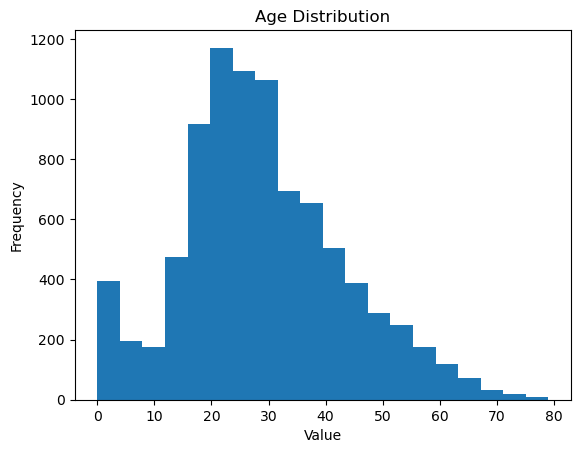

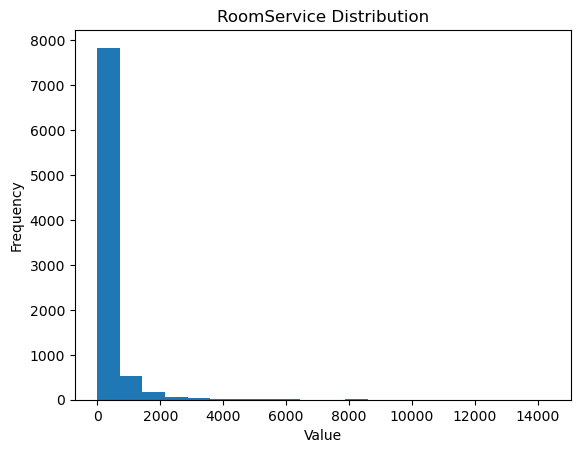

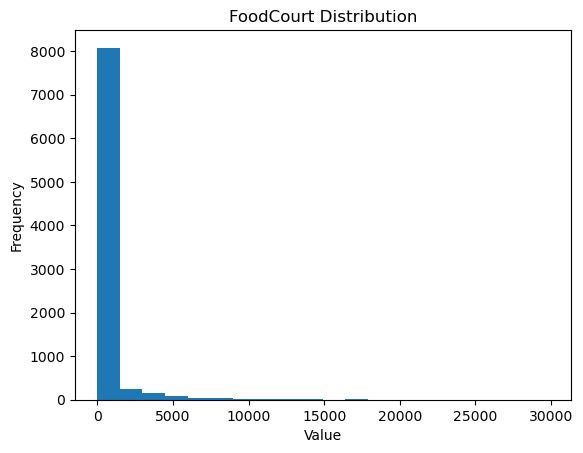

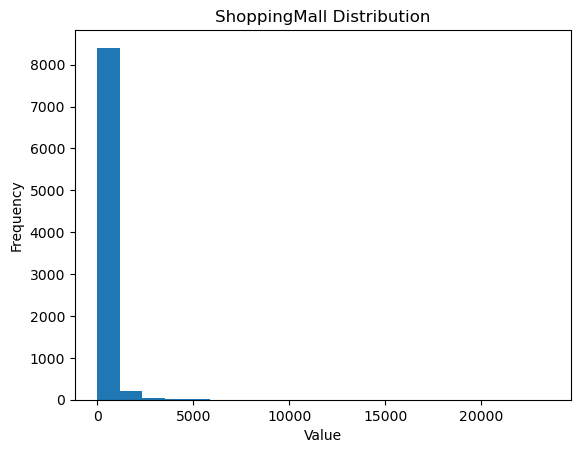

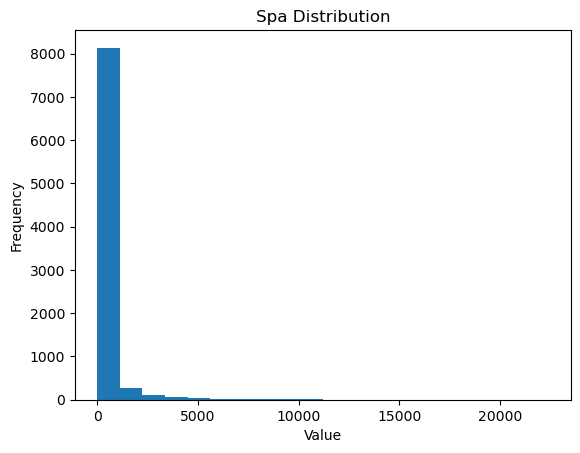

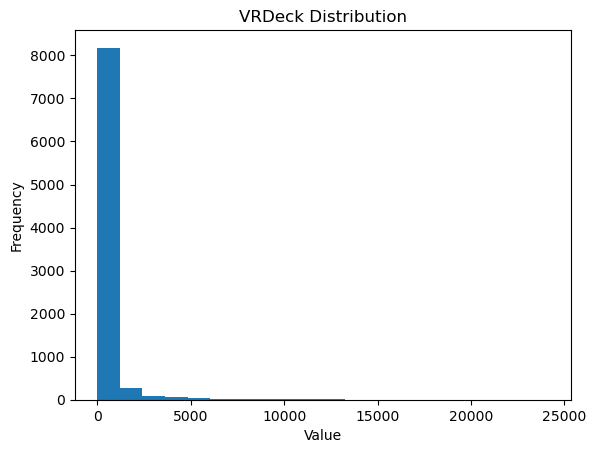

In [14]:
plot_histograms(train)

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.813535,14.318910,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,208.866214,648.470029,0.0,0.0,0.0,30.0,14327.0
FoodCourt,8693.0,434.768975,1541.597607,0.0,0.0,0.0,118.0,29813.0
ShoppingMall,8693.0,165.458065,570.595086,0.0,0.0,0.0,45.0,23492.0
Spa,8693.0,299.353521,1102.428188,0.0,0.0,0.0,89.0,22408.0
VRDeck,8693.0,286.883930,1125.338849,0.0,0.0,0.0,27.0,24133.0


In [16]:
import seaborn as sns

<Axes: xlabel='Age'>

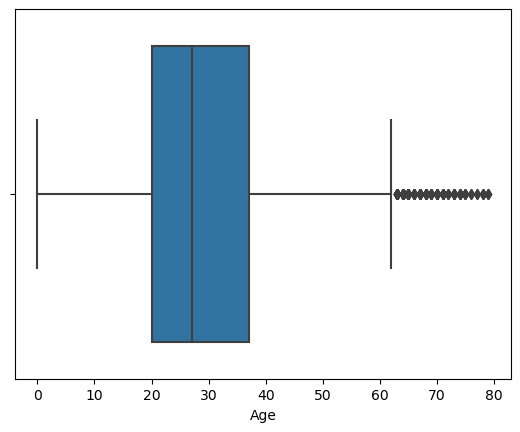

In [17]:
sns.boxplot(data=train, x="Age")

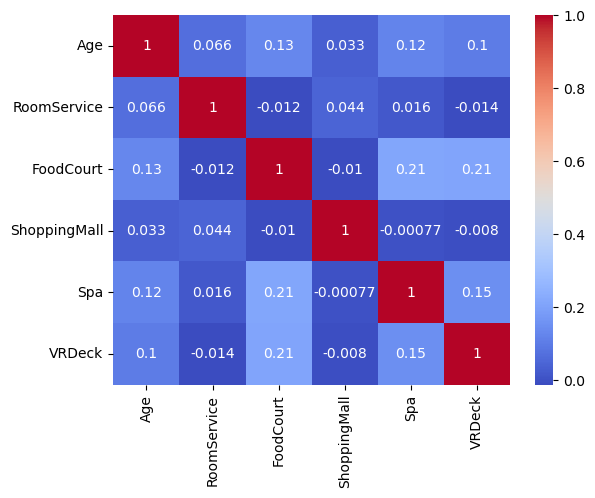

In [18]:
numeric_columns = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
subset = train[numeric_columns]

correlation_matrix = subset.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm");

In [19]:
import statsmodels.api as sm

numeric_columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
target_variable = "Age"
subset = train[numeric_columns + [target_variable]]

X = sm.add_constant(subset[numeric_columns])
y = subset[target_variable]

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     62.31
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           4.75e-64
Time:                        16:01:44   Log-Likelihood:                -35318.
No. Observations:                8693   AIC:                         7.065e+04
Df Residuals:                    8687   BIC:                         7.069e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.4069      0.175    156.751   

In [20]:
def print_value_counts(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            print(f"Kolon Adı: {column}")
            print(data[column].value_counts())
            print()

print_value_counts(train)

Kolon Adı: PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64

Kolon Adı: HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

Kolon Adı: CryoSleep
False    5439
True     3037
Name: CryoSleep, dtype: int64

Kolon Adı: Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

Kolon Adı: Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

Kolon Adı: VIP
False    8291
True      199
Name: VIP, dtype: int64

Kolon Adı: Name
Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [22]:
categorical_columns = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

In [23]:
train["VIP"].fillna(False, inplace=True)

other_columns = ["HomePlanet", "Destination", "CryoSleep"]

for column in other_columns:
    column_counts = train[column].value_counts()
    column_missing = train[column].isnull().sum()
    
    fill_values = column_counts.index.tolist()[:column_missing]
    
    train.loc[train[column].isnull(), column] = np.random.choice(fill_values, size=column_missing)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [25]:
new_train = train.drop(["PassengerId", "Name", "Cabin"], axis=1)

In [26]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(3)
memory usage: 628.3+ KB


In [27]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination']

for column in categorical_columns:
    transported_by_category = new_train.groupby(column)['Transported'].mean()
    print(f"Transported by {column}:")
    print(transported_by_category)
    print()

Transported by HomePlanet:
HomePlanet
Earth     0.424443
Europa    0.654968
Mars      0.524357
Name: Transported, dtype: float64

Transported by CryoSleep:
CryoSleep
False    0.332250
True     0.804886
Name: Transported, dtype: float64

Transported by Destination:
Destination
55 Cancri e      0.607970
PSO J318.5-22    0.502342
TRAPPIST-1e      0.471414
Name: Transported, dtype: float64



In [28]:
bins = [0, 18, 30, 50, np.inf]
labels = ['Very Young', 'Young', 'Middle Age', 'Elderly']
new_train['AgeGroup'] = pd.cut(new_train['Age'], bins=bins, labels=labels)

In [29]:
new_train['TotalServices'] = new_train['RoomService'] + new_train['Spa']

In [30]:
new_train['LogAge'] = np.log1p(new_train['Age'])

In [31]:
new_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,AgeGroup,TotalServices,LogAge
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.000000,0.0,False,Middle Age,0.000000,3.688879
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.000000,44.0,True,Young,658.000000,3.218876
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.000000,49.0,False,Elderly,6758.000000,4.077537
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,299.353521,193.0,False,Middle Age,299.353521,3.526361
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.000000,2.0,True,Very Young,868.000000,2.833213


## Data Visualization

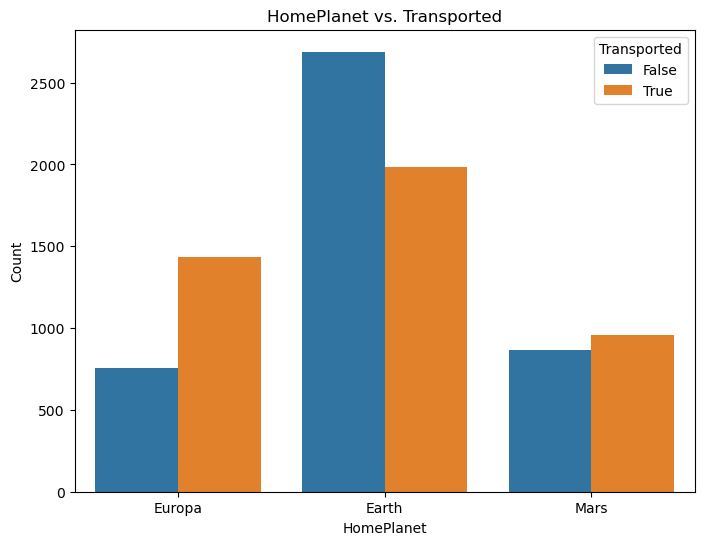

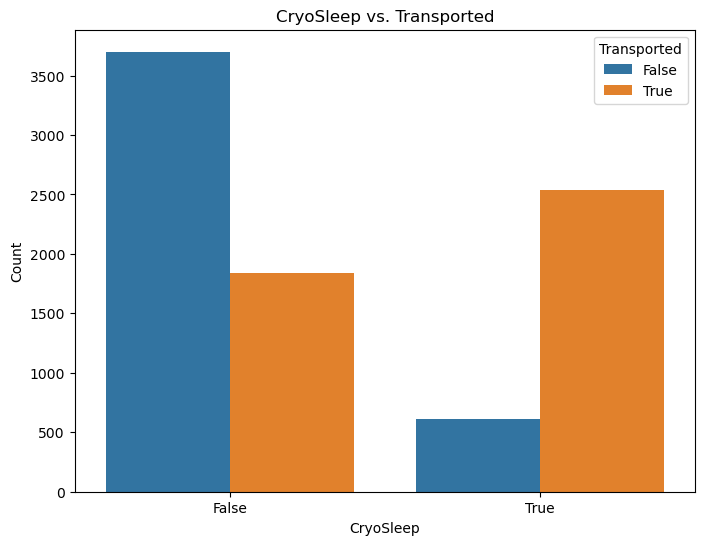

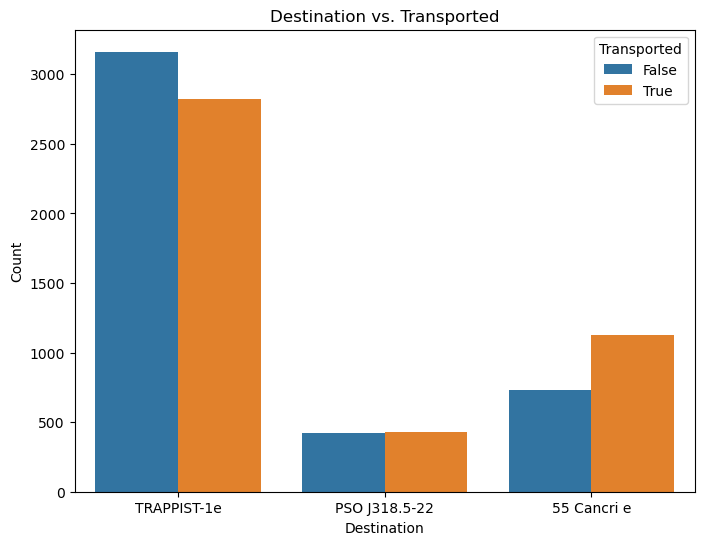

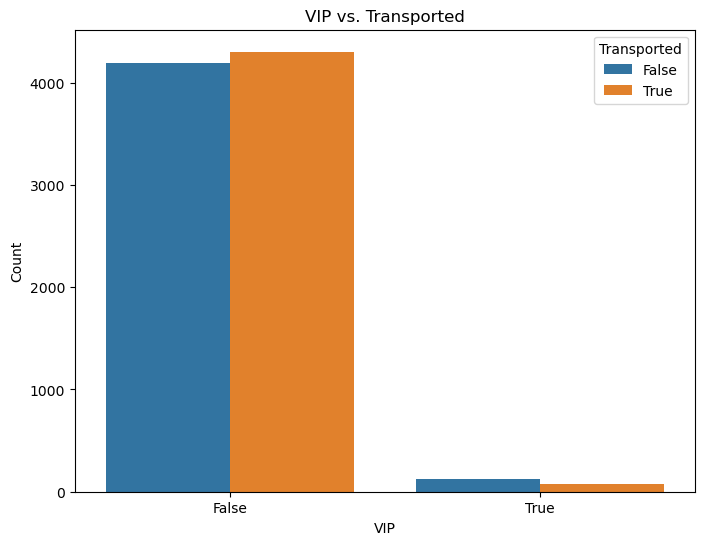

In [32]:
categorical_columns = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=new_train, x=column, hue="Transported")
    plt.title(f"{column} vs. Transported")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title="Transported", loc="upper right")
    plt.show()

In [33]:
vip_ratio = new_train["VIP"].value_counts(normalize=True) * 100
vip_ratio_text = f"VIP Yolcuların Oranı: {vip_ratio[True]:.2f}%\nNon-VIP Yolcuların Oranı: {vip_ratio[False]:.2f}%"

homeplanet_counts = new_train["HomePlanet"].value_counts()
homeplanet_text = "HomePlanet Dağılımı:\n"
for planet, count in homeplanet_counts.items():
    homeplanet_text += f"{planet}: {count}\n"

cryosleep_counts = new_train["CryoSleep"].value_counts()
cryosleep_text = "CryoSleep Dağılımı:\n"
for cryosleep, count in cryosleep_counts.items():
    cryosleep_text += f"{cryosleep}: {count}\n"

destination_counts = new_train["Destination"].value_counts()
destination_text = "Destination Dağılımı:\n"
for destination, count in destination_counts.items():
    destination_text += f"{destination}: {count}\n"

print("Kategorik Özellikler:")
print(vip_ratio_text)
print(homeplanet_text)
print(cryosleep_text)
print(destination_text)

Kategorik Özellikler:
VIP Yolcuların Oranı: 2.29%
Non-VIP Yolcuların Oranı: 97.71%
HomePlanet Dağılımı:
Earth: 4672
Europa: 2194
Mars: 1827

CryoSleep Dağılımı:
False: 5541
True: 3152

Destination Dağılımı:
TRAPPIST-1e: 5982
55 Cancri e: 1857
PSO J318.5-22: 854



In [34]:
categorical_features = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

for feature in categorical_features:
    transported_percentage = new_train.groupby(feature)["Transported"].mean() * 100
    print(f"{feature} ile Transported Durumu Yüzdesi:")
    print(transported_percentage)
    print()

HomePlanet ile Transported Durumu Yüzdesi:
HomePlanet
Earth     42.444349
Europa    65.496809
Mars      52.435687
Name: Transported, dtype: float64

CryoSleep ile Transported Durumu Yüzdesi:
CryoSleep
False    33.225050
True     80.488579
Name: Transported, dtype: float64

Destination ile Transported Durumu Yüzdesi:
Destination
55 Cancri e      60.796984
PSO J318.5-22    50.234192
TRAPPIST-1e      47.141424
Name: Transported, dtype: float64

VIP ile Transported Durumu Yüzdesi:
VIP
False    50.647516
True     38.190955
Name: Transported, dtype: float64



### AgeGroup Bar Chart

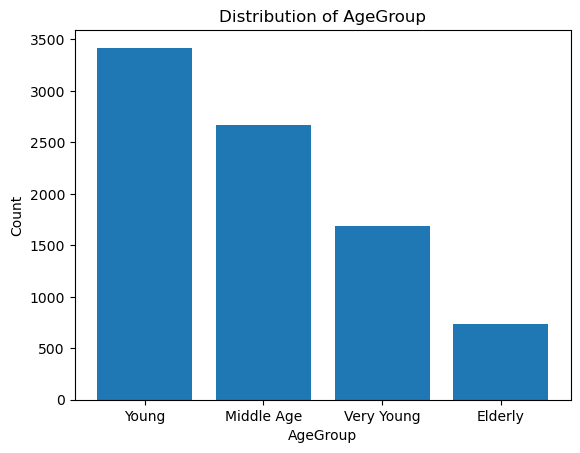

In [35]:
agegroup_counts = new_train['AgeGroup'].value_counts()

plt.bar(agegroup_counts.index, agegroup_counts.values)
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.title('Distribution of AgeGroup')
plt.show()

### TotalServices Histogram

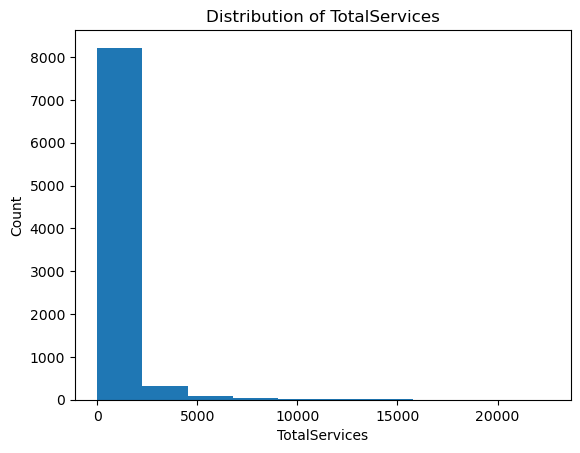

In [36]:
plt.hist(new_train['TotalServices'], bins=10)
plt.xlabel('TotalServices')
plt.ylabel('Count')
plt.title('Distribution of TotalServices')
plt.show()

### LogAge Boxplot

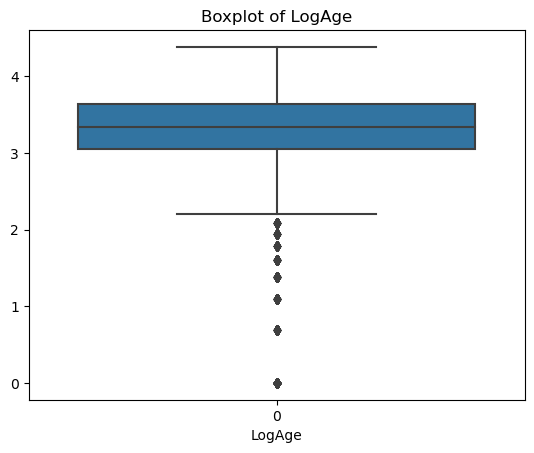

In [37]:
sns.boxplot(new_train['LogAge'])
plt.xlabel('LogAge')
plt.title('Boxplot of LogAge')
plt.show()

### AgeGroup vs Transported BarPlot

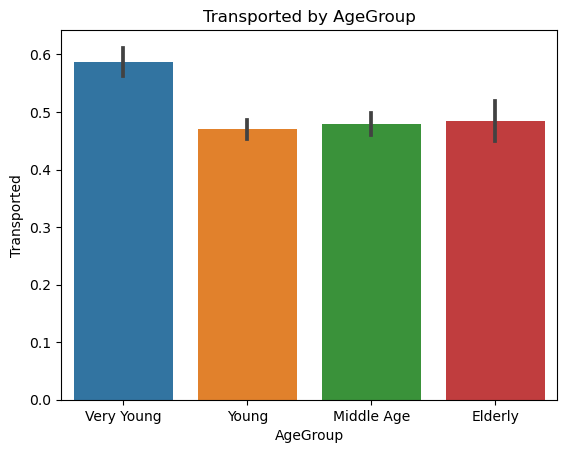

In [38]:
sns.barplot(x='AgeGroup', y='Transported', data=new_train)
plt.xlabel('AgeGroup')
plt.ylabel('Transported')
plt.title('Transported by AgeGroup')
plt.show()

### TotalServices vs Transported BoxPlot

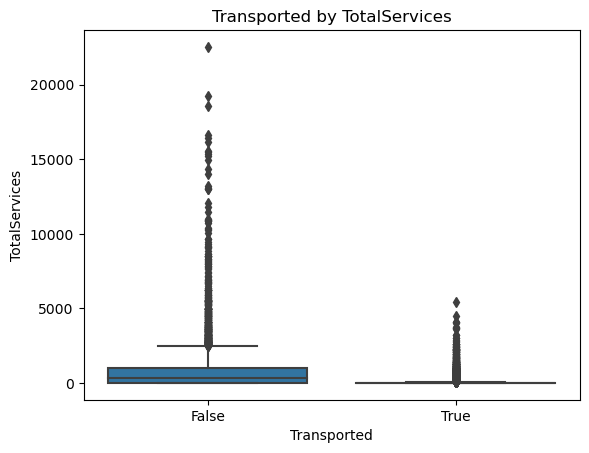

In [39]:
sns.boxplot(x='Transported', y='TotalServices', data=new_train)
plt.xlabel('Transported')
plt.ylabel('TotalServices')
plt.title('Transported by TotalServices')
plt.show()

### LogAge vs Transported BoxPlot

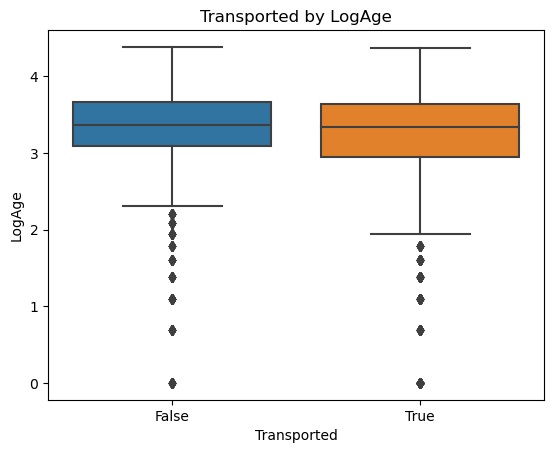

In [40]:
sns.boxplot(x='Transported', y='LogAge', data=new_train)
plt.xlabel('Transported')
plt.ylabel('LogAge')
plt.title('Transported by LogAge')
plt.show()

In [41]:
new_features = ["AgeGroup", "TotalServices", "LogAge"]

for feature in new_features:
    transported_percentage = new_train.groupby(feature)["Transported"].mean() * 100
    print(f"{feature} ile Transported Durumu Yüzdesi:")
    print(transported_percentage)
    print()

AgeGroup ile Transported Durumu Yüzdesi:
AgeGroup
Very Young    58.624778
Young         46.988304
Middle Age    47.943156
Elderly       48.501362
Name: Transported, dtype: float64

TotalServices ile Transported Durumu Yüzdesi:
TotalServices
0.0        73.506928
1.0        44.210526
2.0        56.923077
3.0        45.833333
4.0        37.777778
             ...    
16404.0     0.000000
16594.0     0.000000
18572.0     0.000000
19220.0     0.000000
22533.0     0.000000
Name: Transported, Length: 1922, dtype: float64

LogAge ile Transported Durumu Yüzdesi:
LogAge
0.000000    80.898876
0.693147    73.134328
1.098612    70.666667
1.386294    78.666667
1.609438    74.647887
              ...    
4.330733    50.000000
4.343805    50.000000
4.356709    50.000000
4.369448    33.333333
4.382027     0.000000
Name: Transported, Length: 81, dtype: float64



In [42]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'AgeGroup']

for column in categorical_columns:
    grouped_data = new_train.groupby(column)['Transported'].mean() * 100
    print(f"{column} ile Transported Durumu Yüzdesi:\n{grouped_data}\n")

HomePlanet ile Transported Durumu Yüzdesi:
HomePlanet
Earth     42.444349
Europa    65.496809
Mars      52.435687
Name: Transported, dtype: float64

CryoSleep ile Transported Durumu Yüzdesi:
CryoSleep
False    33.225050
True     80.488579
Name: Transported, dtype: float64

Destination ile Transported Durumu Yüzdesi:
Destination
55 Cancri e      60.796984
PSO J318.5-22    50.234192
TRAPPIST-1e      47.141424
Name: Transported, dtype: float64

VIP ile Transported Durumu Yüzdesi:
VIP
False    50.647516
True     38.190955
Name: Transported, dtype: float64

AgeGroup ile Transported Durumu Yüzdesi:
AgeGroup
Very Young    58.624778
Young         46.988304
Middle Age    47.943156
Elderly       48.501362
Name: Transported, dtype: float64



### Plotting to all Numerical Values

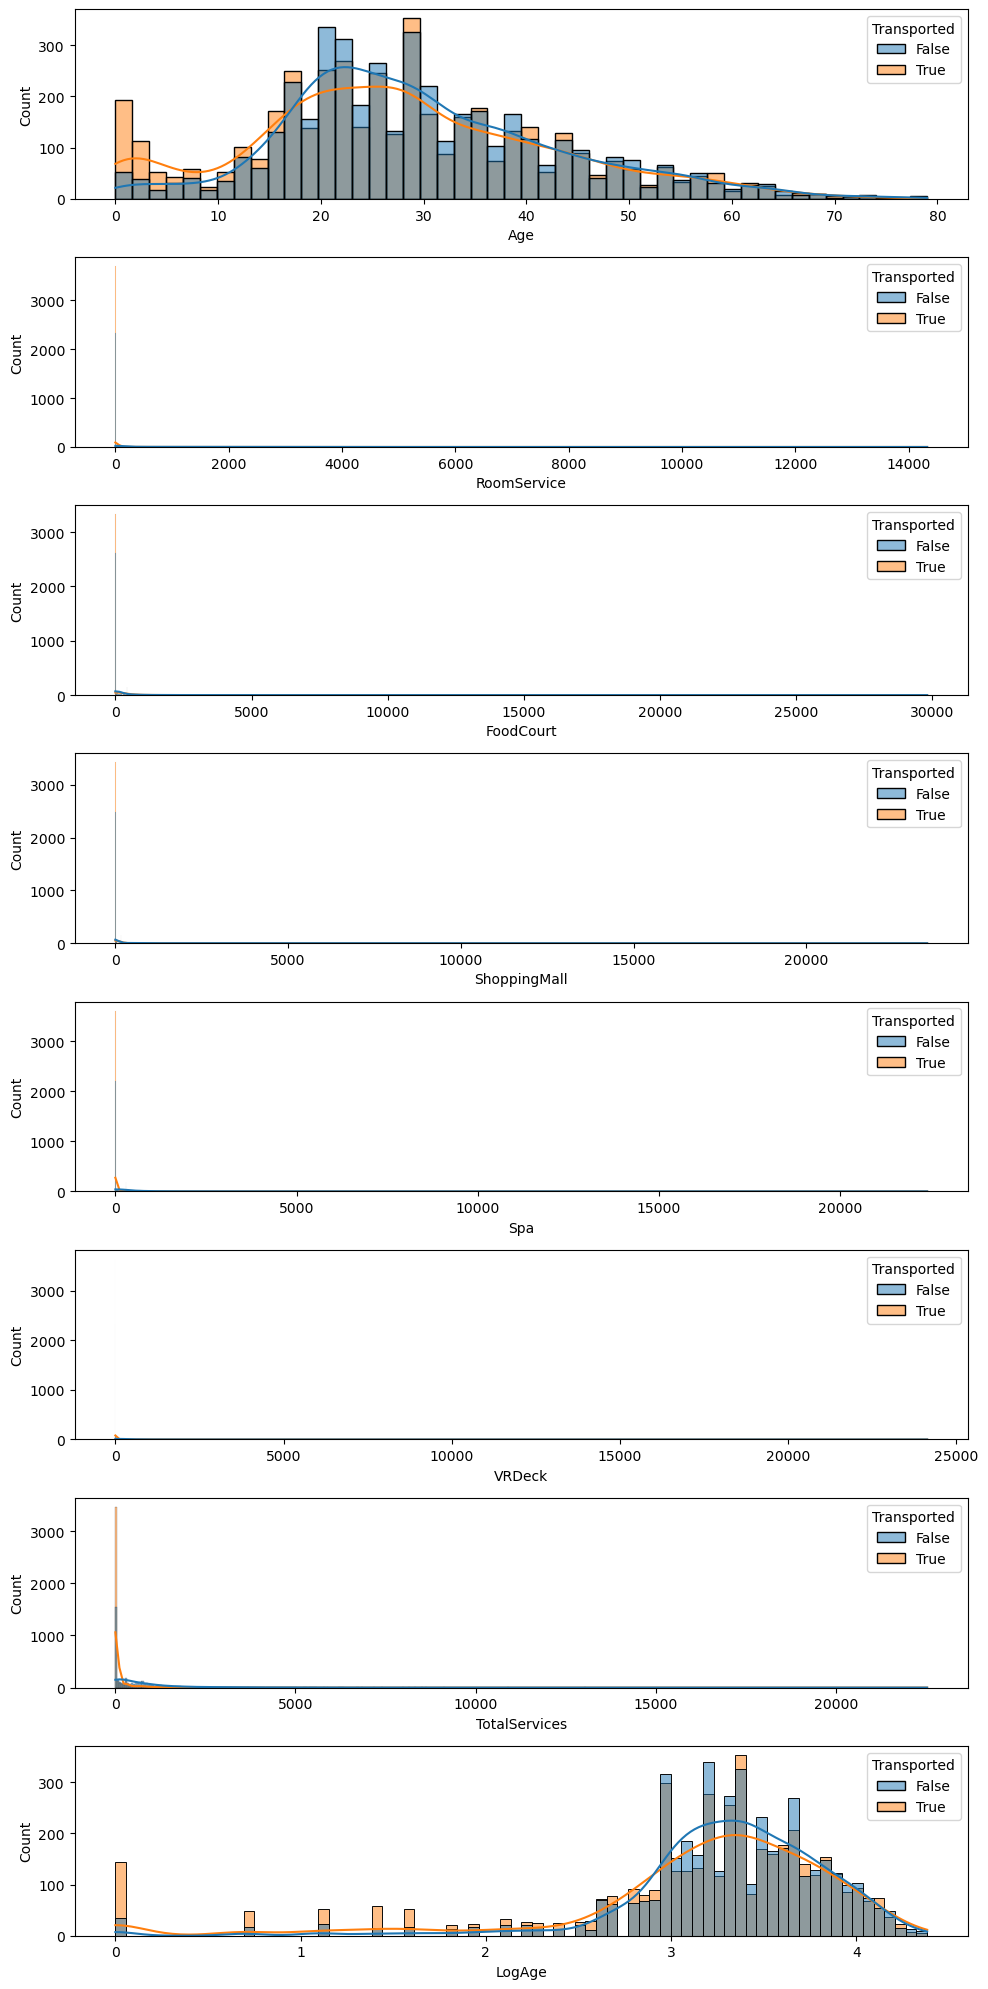

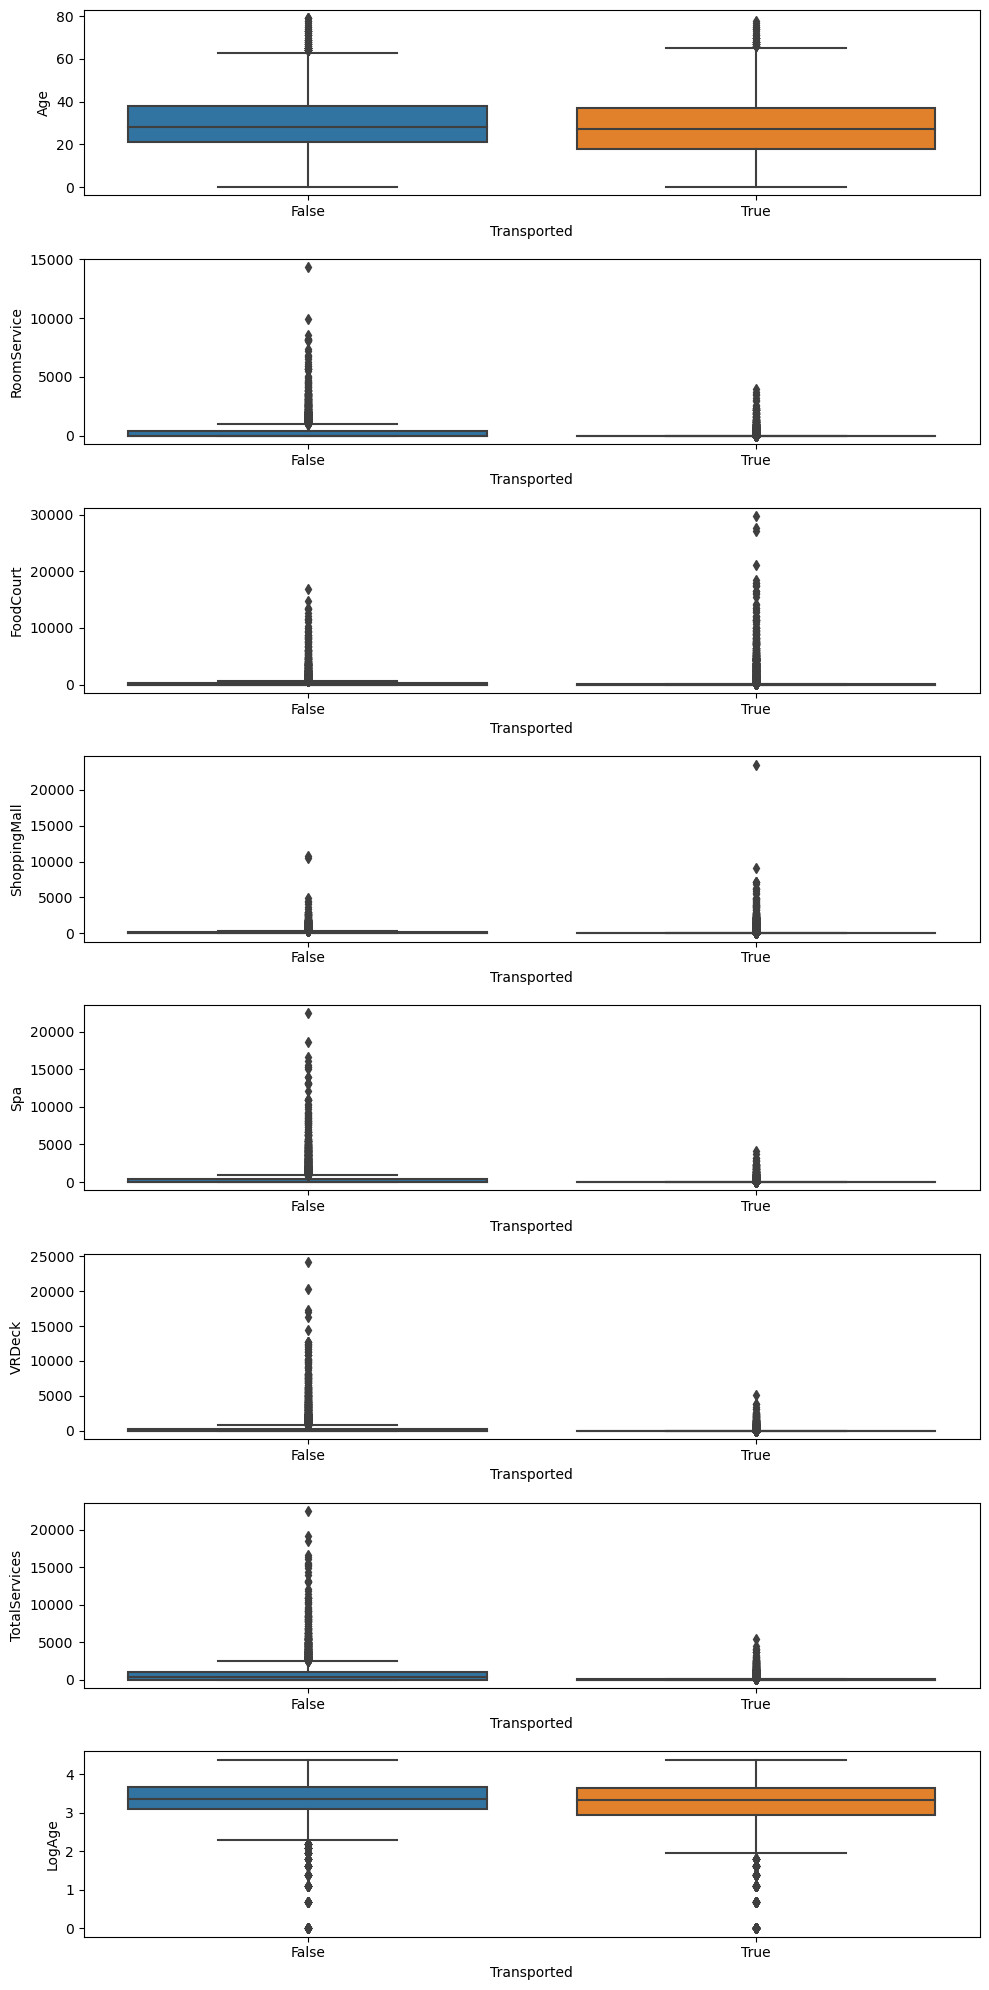

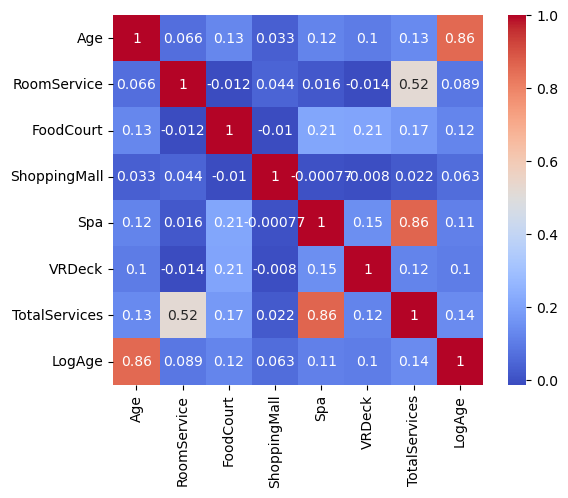

In [43]:
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalServices', 'LogAge']
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 20))

for i, column in enumerate(numerical_columns):
    sns.histplot(data=new_train, x=column, hue='Transported', kde=True, ax=axes[i])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 20))

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=new_train, x='Transported', y=column, ax=axes[i])

plt.tight_layout()
plt.show()

corr_matrix = new_train[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [44]:
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalServices', 'LogAge']
transported_means = new_train.groupby('Transported')[numerical_columns].mean()
transported_std = new_train.groupby('Transported')[numerical_columns].std()

transported_stats = pd.concat([transported_means, transported_std], axis=1)
transported_stats.columns = pd.MultiIndex.from_product([['Mean', 'Std'], numerical_columns])
transported_stats = transported_stats.round(2)

print(transported_stats)

              Mean                                                     \
               Age RoomService FoodCourt ShoppingMall     Spa  VRDeck   
Transported                                                             
False        29.88      360.43    364.50       160.72  536.83  514.32   
True         27.76       59.48    504.03       170.13   65.29   62.72   

                                    Std                                     \
            TotalServices LogAge    Age RoomService FoodCourt ShoppingMall   
Transported                                                                  
False              897.26   3.30  13.53      853.93   1159.16       440.07   
True               124.78   3.13  14.98      267.21   1839.95       675.00   

                                                    
                 Spa   VRDeck TotalServices LogAge  
Transported                                         
False        1506.46  1540.41       1700.67   0.59  
True          257.53   273.62  

In [45]:
new_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,AgeGroup,TotalServices,LogAge
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.000000,0.0,False,Middle Age,0.000000,3.688879
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.000000,44.0,True,Young,658.000000,3.218876
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.000000,49.0,False,Elderly,6758.000000,4.077537
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,299.353521,193.0,False,Middle Age,299.353521,3.526361
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.000000,2.0,True,Very Young,868.000000,2.833213


In [46]:
y = new_train['Age']
X = new_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     62.31
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           4.75e-64
Time:                        16:03:27   Log-Likelihood:                -35318.
No. Observations:                8693   AIC:                         7.065e+04
Df Residuals:                    8687   BIC:                         7.069e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.4069      0.175    156.751   

In [47]:
encoded_data = pd.get_dummies(new_train, columns=['HomePlanet', 'AgeGroup'])

print(encoded_data.head())

  CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall  \
0     False  TRAPPIST-1e  39.0  False          0.0        0.0           0.0   
1     False  TRAPPIST-1e  24.0  False        109.0        9.0          25.0   
2     False  TRAPPIST-1e  58.0   True         43.0     3576.0           0.0   
3     False  TRAPPIST-1e  33.0  False          0.0     1283.0         371.0   
4     False  TRAPPIST-1e  16.0  False        303.0       70.0         151.0   

           Spa  VRDeck  Transported  TotalServices    LogAge  \
0     0.000000     0.0        False       0.000000  3.688879   
1   549.000000    44.0         True     658.000000  3.218876   
2  6715.000000    49.0        False    6758.000000  4.077537   
3   299.353521   193.0        False     299.353521  3.526361   
4   565.000000     2.0         True     868.000000  2.833213   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  AgeGroup_Very Young  \
0                 0                  1                0     

In [48]:
encoded_data.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalServices,LogAge,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,AgeGroup_Very Young,AgeGroup_Young,AgeGroup_Middle Age,AgeGroup_Elderly
0,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.000000,0.0,False,0.000000,3.688879,0,1,0,0,0,1,0
1,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.000000,44.0,True,658.000000,3.218876,1,0,0,0,1,0,0
2,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.000000,49.0,False,6758.000000,4.077537,0,1,0,0,0,0,1
3,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,299.353521,193.0,False,299.353521,3.526361,0,1,0,0,0,1,0
4,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.000000,2.0,True,868.000000,2.833213,1,0,0,1,0,0,0


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [50]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   HomePlanet     8693 non-null   object  
 1   CryoSleep      8693 non-null   object  
 2   Destination    8693 non-null   object  
 3   Age            8693 non-null   float64 
 4   VIP            8693 non-null   bool    
 5   RoomService    8693 non-null   float64 
 6   FoodCourt      8693 non-null   float64 
 7   ShoppingMall   8693 non-null   float64 
 8   Spa            8693 non-null   float64 
 9   VRDeck         8693 non-null   float64 
 10  Transported    8693 non-null   bool    
 11  AgeGroup       8515 non-null   category
 12  TotalServices  8693 non-null   float64 
 13  LogAge         8693 non-null   float64 
dtypes: bool(2), category(1), float64(8), object(3)
memory usage: 772.8+ KB


In [51]:
train['Transported'] = train['Transported'].astype(int)
new_train['Transported'] = new_train['Transported'].astype(int)

In [52]:
import warnings 
warnings.filterwarnings("ignore")

In [53]:
train_corr = train.corr()
train_corr

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.091856,0.066231,0.127107,0.032515,0.118091,0.099765,-0.074056
VIP,0.091856,1.000000,0.057214,0.126024,0.020922,0.058384,0.122283,-0.037261
RoomService,0.066231,0.057214,1.000000,-0.012279,0.044267,0.015702,-0.013688,-0.232051
FoodCourt,0.127107,0.126024,-0.012279,1.000000,-0.010249,0.211485,0.206598,0.045257
ShoppingMall,0.032515,0.020922,0.044267,-0.010249,1.000000,-0.000766,-0.007988,0.008242
Spa,0.118091,0.058384,0.015702,0.211485,-0.000766,1.000000,0.145002,-0.213871
VRDeck,0.099765,0.122283,-0.013688,0.206598,-0.007988,0.145002,1.000000,-0.200659
Transported,-0.074056,-0.037261,-0.232051,0.045257,0.008242,-0.213871,-0.200659,1.000000


In [54]:
new_train_corr = new_train.corr()
new_train_corr

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalServices,LogAge
Age,1.000000,0.091856,0.066231,0.127107,0.032515,0.118091,0.099765,-0.074056,0.134447,0.855454
VIP,0.091856,1.000000,0.057214,0.126024,0.020922,0.058384,0.122283,-0.037261,0.078792,0.080937
RoomService,0.066231,0.057214,1.000000,-0.012279,0.044267,0.015702,-0.013688,-0.232051,0.517009,0.089108
FoodCourt,0.127107,0.126024,-0.012279,1.000000,-0.010249,0.211485,0.206598,0.045257,0.174866,0.122546
ShoppingMall,0.032515,0.020922,0.044267,-0.010249,1.000000,-0.000766,-0.007988,0.008242,0.021636,0.062711
Spa,0.118091,0.058384,0.015702,0.211485,-0.000766,1.000000,0.145002,-0.213871,0.863993,0.110660
VRDeck,0.099765,0.122283,-0.013688,0.206598,-0.007988,0.145002,1.000000,-0.200659,0.117241,0.102331
Transported,-0.074056,-0.037261,-0.232051,0.045257,0.008242,-0.213871,-0.200659,1.000000,-0.299944,-0.119959
TotalServices,0.134447,0.078792,0.517009,0.174866,0.021636,0.863993,0.117241,-0.299944,1.000000,0.139606
LogAge,0.855454,0.080937,0.089108,0.122546,0.062711,0.110660,0.102331,-0.119959,0.139606,1.000000


In [55]:
encoded_data.head()

,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalServices,LogAge,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,AgeGroup_Very Young,AgeGroup_Young,AgeGroup_Middle Age,AgeGroup_Elderly
0,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.000000,0.0,False,0.000000,3.688879,0,1,0,0,0,1,0
1,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.000000,44.0,True,658.000000,3.218876,1,0,0,0,1,0,0
2,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.000000,49.0,False,6758.000000,4.077537,0,1,0,0,0,0,1
3,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,299.353521,193.0,False,299.353521,3.526361,0,1,0,0,0,1,0
4,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.000000,2.0,True,868.000000,2.833213,1,0,0,1,0,0,0


In [56]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CryoSleep            8693 non-null   object 
 1   Destination          8693 non-null   object 
 2   Age                  8693 non-null   float64
 3   VIP                  8693 non-null   bool   
 4   RoomService          8693 non-null   float64
 5   FoodCourt            8693 non-null   float64
 6   ShoppingMall         8693 non-null   float64
 7   Spa                  8693 non-null   float64
 8   VRDeck               8693 non-null   float64
 9   Transported          8693 non-null   bool   
 10  TotalServices        8693 non-null   float64
 11  LogAge               8693 non-null   float64
 12  HomePlanet_Earth     8693 non-null   uint8  
 13  HomePlanet_Europa    8693 non-null   uint8  
 14  HomePlanet_Mars      8693 non-null   uint8  
 15  AgeGroup_Very Young  8693 non-null   u

In [57]:
encoded_data.Destination.value_counts()

TRAPPIST-1e      5982
55 Cancri e      1857
PSO J318.5-22     854
Name: Destination, dtype: int64

In [58]:
encoded_data = pd.get_dummies(encoded_data, columns=['Destination'], prefix='Destination')

In [59]:
encoded_data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'TotalServices', 'LogAge',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'AgeGroup_Very Young', 'AgeGroup_Young', 'AgeGroup_Middle Age',
       'AgeGroup_Elderly', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [60]:
encoded_data['CryoSleep'] = encoded_data['CryoSleep'].astype(int)
encoded_data['VIP'] = encoded_data['VIP'].astype(int)
encoded_data['Transported'] = encoded_data['Transported'].astype(int)

## Model Training

### Logistic Regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = encoded_data.drop('Transported', axis=1)

y = encoded_data['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7602070155261644


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7602070155261644
Precision: 0.750271444082519
Recall: 0.7870159453302962
F1 Score: 0.7682045580878266


In [63]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  # cv değeri k-fold çapraz doğrulama sayısını belirtir

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.76250719 0.77285796 0.78090857 0.77733026 0.783084  ]
Mean CV Score: 0.7753375979608137


### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

X = encoded_data.drop('Transported', axis=1)
y = encoded_data['Transported']

model = DecisionTreeClassifier()

model.fit(X, y)

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

cv_scores = cross_val_score(model, X, y, cv=5)
mean_cv_score = cv_scores.mean()

print("Model Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)

Model Accuracy: 0.9325894397791327
Precision: 0.9061696658097687
Recall: 0.9661946094106898
F1 Score: 0.9352199867344683
Cross-Validation Scores: [0.72052904 0.72340426 0.72340426 0.72209436 0.72957422]
Mean CV Score: 0.7238012269792502


### Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

X = encoded_data.drop("Transported", axis=1)
y = encoded_data["Transported"]

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

accuracy = rf_model.score(X, y)
precision = metrics.precision_score(y, rf_model.predict(X))
recall = metrics.recall_score(y, rf_model.predict(X))
f1_score = metrics.f1_score(y, rf_model.predict(X))

cv_scores = cross_val_score(rf_model, X, y, cv=5)
mean_cv_score = cv_scores.mean()

print("Model Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)

Model Accuracy: 0.9325894397791327
Precision: 0.8974842767295598
Recall: 0.9778437642759251
F1 Score: 0.9359422824661128
Cross-Validation Scores: [0.77630822 0.76423232 0.77343301 0.78883774 0.79631761]
Mean CV Score: 0.7798257797988474


## Model Tuning

### Random Forest Classifier Tuning

In [66]:
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 8, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt']
}

In [67]:
## from sklearn.model_selection import GridSearchCV
## rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X, y)

In [68]:
# rf_cv_model.best_params_

In [69]:
rf_tuned = RandomForestClassifier(max_depth=15, max_features="sqrt", min_samples_leaf=5,
                                  min_samples_split=5, n_estimators=100).fit(X,y)

In [70]:
accuracy = rf_tuned.score(X, y)
precision = metrics.precision_score(y, rf_tuned.predict(X))
recall = metrics.recall_score(y, rf_tuned.predict(X))
f1_score = metrics.f1_score(y, rf_tuned.predict(X))

cv_scores = cross_val_score(rf_tuned, X, y)
mean_cv_score = cv_scores.mean()

print("Model Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)

Model Accuracy: 0.844242493960658
Precision: 0.8378016085790885
Recall: 0.8565555047967108
F1 Score: 0.84707476846623
Cross-Validation Scores: [0.78033353 0.78033353 0.79010926 0.80437284 0.80322209]
Mean CV Score: 0.7916742489863955


In [71]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   TotalServices              8693 non-null   float64
 10  LogAge                     8693 non-null   float64
 11  HomePlanet_Earth           8693 non-null   uint8  
 12  HomePlanet_Europa          8693 non-null   uint8  
 13  HomePlanet_Mars            8693 non-null   uint8

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## Submission

In [73]:
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels)

test['TotalServices'] = test['RoomService'] + test['Spa']

test['LogAge'] = np.log1p(test['Age'])

test_encoded = pd.get_dummies(test, columns=['HomePlanet', 'AgeGroup'])

In [74]:
test_encoded = pd.get_dummies(test_encoded, columns=['Destination'], prefix='Destination')

In [75]:
feature_cols = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
                'Spa', 'VRDeck', 'TotalServices', 'LogAge', 'HomePlanet_Earth',
                'HomePlanet_Europa', 'HomePlanet_Mars', 'AgeGroup_Very Young',
                'AgeGroup_Young', 'AgeGroup_Middle Age', 'AgeGroup_Elderly',
                'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']

test_encoded = test_encoded[feature_cols]

In [76]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
test_encoded_imputed = imputer.fit_transform(test_encoded)

test_encoded = pd.DataFrame(test_encoded_imputed, columns=test_encoded.columns)

In [77]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   float64
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   float64
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   TotalServices              4277 non-null   float64
 9   LogAge                     4277 non-null   float64
 10  HomePlanet_Earth           4277 non-null   float64
 11  HomePlanet_Europa          4277 non-null   float64
 12  HomePlanet_Mars            4277 non-null   float64
 13  AgeGroup_Very Young        4277 non-null   float

In [78]:
test_encoded['Transported'] = rf_tuned.predict(test_encoded)
test_encoded['Transported'] = test_encoded['Transported'].astype(bool)

In [79]:
submission_data = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': test_encoded['Transported']})
submission_data.to_csv('submission.csv', index=False)